# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Downloads/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
df.drop(columns='name', inplace=True)

In [6]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.shape

(195, 23)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [11]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

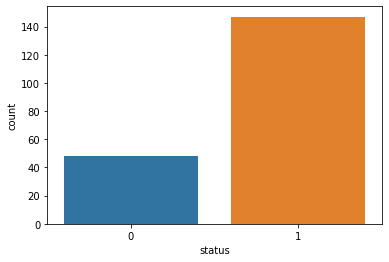

In [12]:
sns.countplot(x='status', data=df)
plt.show()

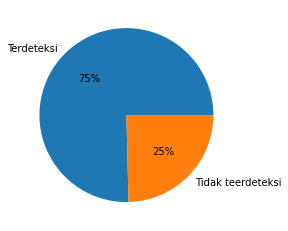

In [13]:
x = df.status.value_counts()
labels = ['Terdeteksi' ,'Tidak teerdeteksi']
plt.pie(x, labels =labels, autopct = '%.0f%%')
plt.show()

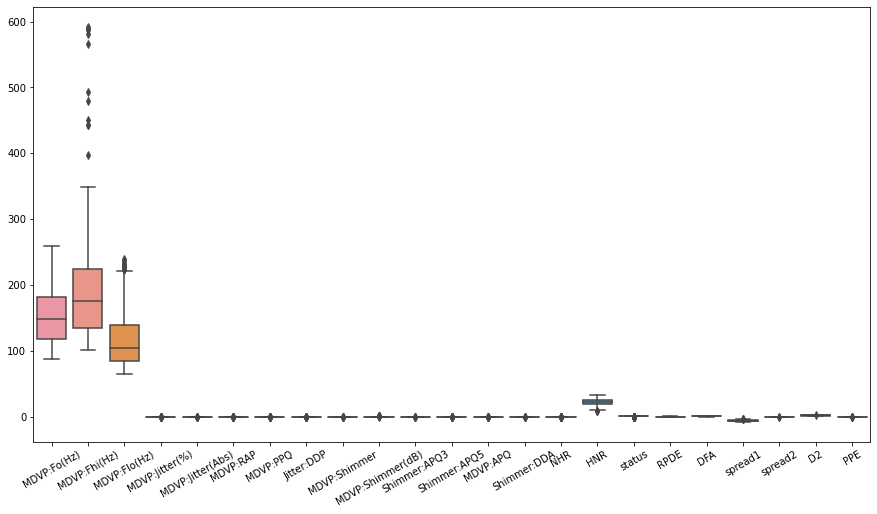

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=30)
plt.show()

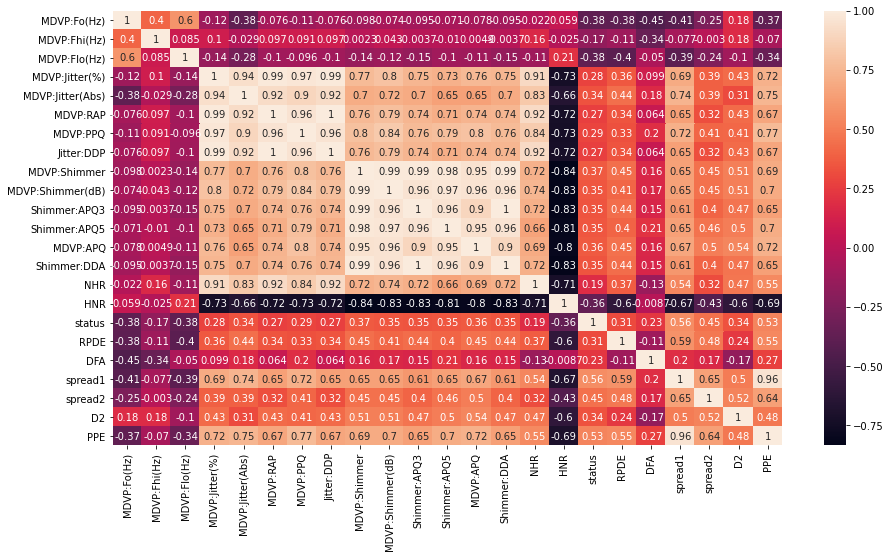

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);

# Dataset Splitting

In [16]:
X = df.drop(columns=['status'])
y = df.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 22), (39, 22), (156,), (39,))

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
      ('numeric', numerical_pipeline, X_train.columns)
])

lr = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

lr.fit(X_train, y_train)
print(f'score data train: {lr.score(X_train, y_train)*100:.2f}')
print(f'score data test: {lr.score(X_test, y_test)*100:.2f}')

score data train: 87.18
score data test: 89.74


<AxesSubplot:>

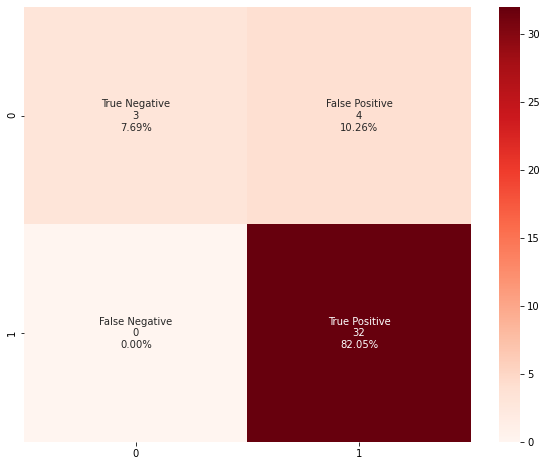

In [19]:
lr_predict = lr.predict(X_test)

cm = confusion_matrix(y_test, lr_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=labels,fmt='',cmap='Reds')

# Random Forest 

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
      ('numeric', numerical_pipeline, X_train.columns)
])

rfc = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

rfc.fit(X_train, y_train)
print(f'score data train: {rfc.score(X_train, y_train)*100:.2f}')
print(f'score data test: {rfc.score(X_test, y_test)*100:.2f}')

score data train: 100.00
score data test: 92.31


<AxesSubplot:>

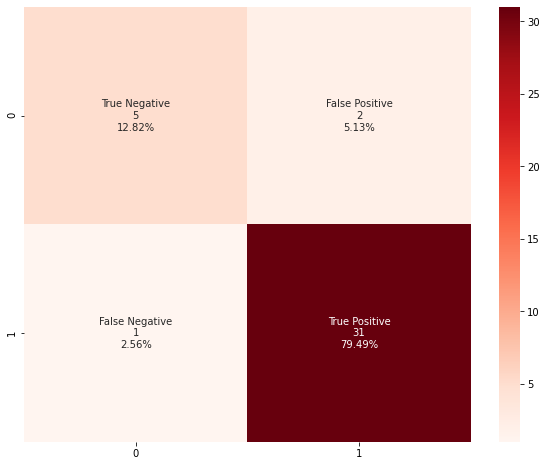

In [22]:
rfc_predict = rfc.predict(X_test)

cm1 = confusion_matrix(y_test, rfc_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm1.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm1,annot=labels,fmt='',cmap='Reds')

# SVC

In [23]:
from sklearn.svm import SVC

In [24]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
      ('numeric', numerical_pipeline, X_train.columns)
])

svc = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC())
])

svc.fit(X_train, y_train)
print(f'score data train: {svc.score(X_train, y_train)*100:.2f}')
print(f'score data test: {svc.score(X_test, y_test)*100:.2f}')

score data train: 89.10
score data test: 89.74


<AxesSubplot:>

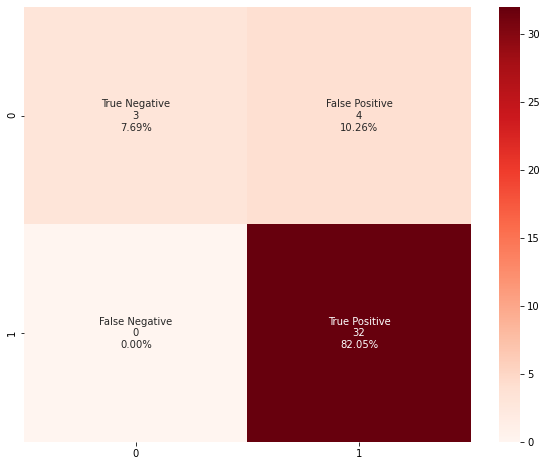

In [25]:
svc_predict = svc.predict(X_test)

cm3 = confusion_matrix(y_test, svc_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm3.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm3.flatten()/np.sum(cm3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm3,annot=labels,fmt='',cmap='Reds')

# XGBoost

In [26]:
from xgboost import XGBClassifier

In [27]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
      ('numeric', numerical_pipeline, X_train.columns)
])

xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

xgb.fit(X_train, y_train)
print(f'score data train: {xgb.score(X_train, y_train)*100:.2f}')
print(f'score data test: {xgb.score(X_test, y_test)*100:.2f}')

[20:17:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score data train: 100.00
score data test: 94.87


<AxesSubplot:>

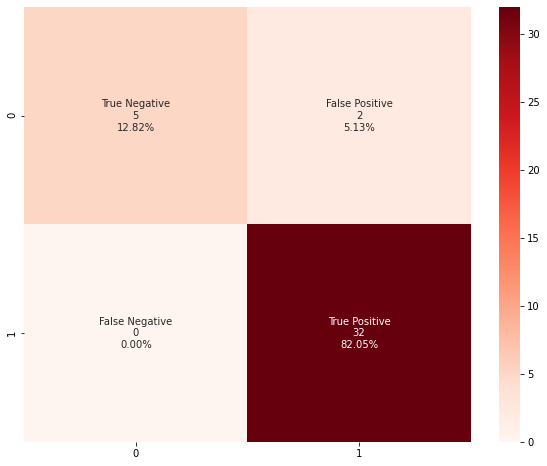

In [28]:
xgb_predict = xgb.predict(X_test)

cm4 = confusion_matrix(y_test, xgb_predict)

class_names=["True Negative","False Positive","False Negative","True Positive"]
class_counts=["{0:0.0f}".format(value) for value in cm4.flatten()]
class_percentages = ["{0:.2%}".format(value) for value in cm4.flatten()/np.sum(cm4)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(class_names,class_counts,class_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(cm4,annot=labels,fmt='',cmap='Reds')